# Project 1

In this first project you will create a framework to scope out data science projects. This framework will provide you with a guide to develop a well-articulated problem statement and analysis plan that will be robust and reproducible.

### Read and evaluate the following problem statement: 
Determine which free-tier customers will covert to paying customers, using demographic data collected at signup (age, gender, location, and profession) and customer useage data (days since last log in, and activity score 1 = active user, 0= inactive user) based on Hooli data from Jan-Apr 2015. 


#### 1. What is the outcome?

Answer: 

#### 2. What are the predictors/covariates? 

Answer: 

#### 3. What timeframe is this data relevent for?

Answer: for Jan-APr 2015

#### 4. What is the hypothesis?

Answer: 

## Let's get started with the ADMISSIONS dataset

#### 1. Create a data dictionary 

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import pylab as pl
import numpy as np
from pprint import pprint

df = pd.read_csv('C:/Users/rasal/Data/DAT-2017-03-20/projects/unit-projects/project-1/assets/admissions.csv')
df.head()

df.describe()



,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,520.000000,3.13000,2.000000
50%,0.000000,580.000000,3.39500,2.000000
75%,1.000000,660.000000,3.67000,3.000000
max,1.000000,800.000000,4.00000,4.000000


In [2]:
# creating dictionary to what are the values for each column
uniques={}
for x in df.columns:
    #print(df[x].unique())
    uniques[x]=df[x].unique()
    
pprint(uniques)    #uniques=uniques.append(df[x].unique)#,columns=df[x].columns.values.tolist())

{'admit': array([0, 1], dtype=int64),
 'gpa': array([ 3.61,  3.67,  4.  ,  3.19,  2.93,  3.  ,  2.98,  3.08,  3.39,
        3.92,  3.22,  3.44,  3.87,  2.56,  3.75,  3.81,  3.17,  3.63,
        2.82,  3.35,  3.66,  3.74,  3.29,  3.78,  3.4 ,  3.14,  3.05,
        3.25,  2.9 ,  3.13,  2.68,  2.42,  3.32,  3.15,  3.31,  2.94,
        3.45,  3.46,  2.97,  2.48,  3.86,  3.37,  3.27,  3.34,  3.65,
        3.18,  3.85,  3.59,  3.62,  3.3 ,  3.69,  3.73,  2.92,  3.36,
        3.12,  3.07,  2.71,  2.91,  3.6 ,  3.48,  3.28,  3.83,  3.64,
        3.9 ,  3.33,  3.52,  3.57,  2.88,  3.94,  3.95,  3.56,  3.41,
        3.84,  3.99,  3.72,  3.7 ,  2.67,  2.85,  3.88,  3.38,  3.54,
        2.79,  2.95,  3.58,  3.93,  3.43,  2.86,  2.52,  3.49,  3.82,
        3.5 ,  2.73,  3.24,  3.77,  3.51,  2.81,  3.53,  2.62,  3.23,
        3.01,   nan,  3.76,  3.47,  3.2 ,  3.89,  3.8 ,  3.16,  3.02,
        2.87,  3.42,  2.76,  2.96,  3.04,  3.91,  3.21,  3.55,  3.11,
        3.1 ,  2.26,  2.78,  3.97,  2.55,  3

Answer: 

Variable | Description | Type of Variable
---| ---| ---
Admit| 0 = not addmited 1 = addmited | categorical
GPA | GPA per entrant | continuous 
GRE|GRE score per entrant | continious
Prestige| School Prestige, from 1 to 4 | categorical



We would like to explore the association between X and Y 

#### 2. What is the outcome?

Answer: Either the person gets admitted to school or no.

#### 3. What are the predictors/covariates? 

Answer: GPA -score of specific applicant
        GRE - score of specific applicant
        Prestige- Prestige of specific school

#### 4. What timeframe is this data relevent for?

Answer: It looks like it is for current year and will be used to predict current year admissions based on above parameters.

#### 4. What is the hypothesis?

Answer: The GPA, GRE and Prestige of the school does not have any predictive power for addmission of students.



    Using the above information, write a well-formed problem statement. 


## Problem Statement

### Exploratory Analysis Plan

Using the lab from a class as a guide, create an exploratory analysis plan. 

#### 1. What are the goals of the exploratory analysis? 

Answer: To check data, to see whether it is normally distributed, has any outliers etc...

#### 2a. What are the assumptions of the distribution of data? 

Answer: Data should be normally distributed.

#### 2b. How will you determine the distribution of your data? 

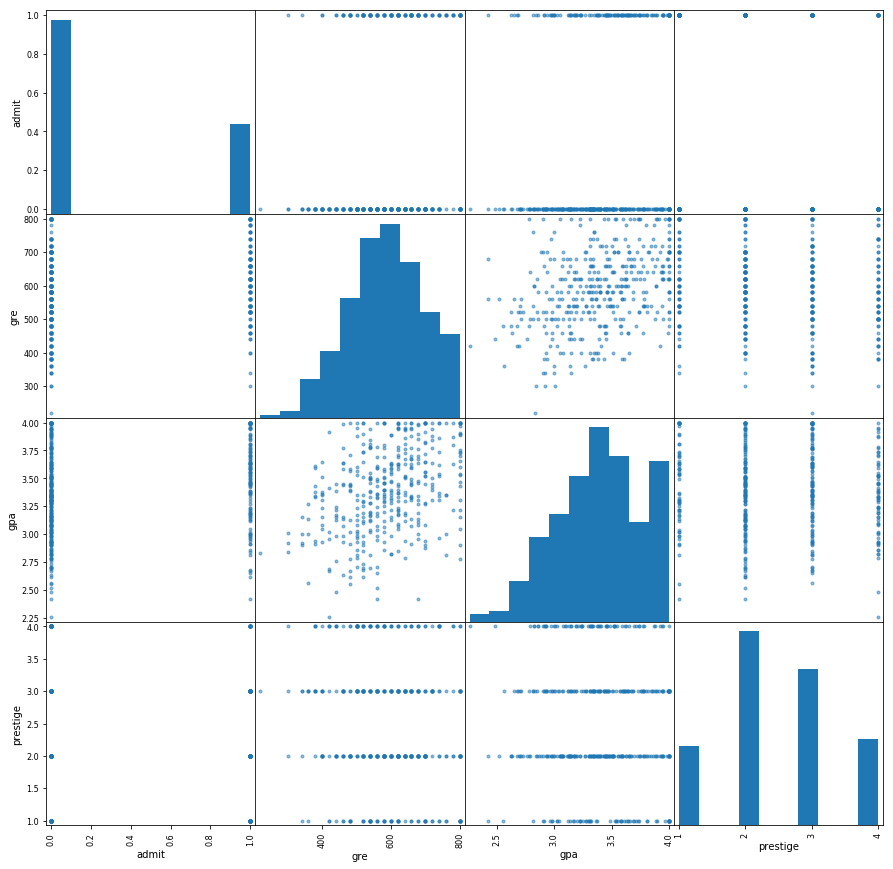

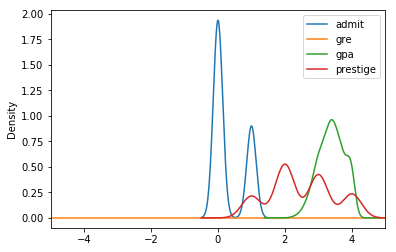

In [48]:
pd.scatter_matrix(df,figsize=(15,15))


df.plot(kind='density',xlim=(-5,5))

df.plot('density')
print(df)

#### 3a. How might outliers impact your analysis? 

Answer: They could skew the analysis...

#### 3b. How will you test for outliers? 

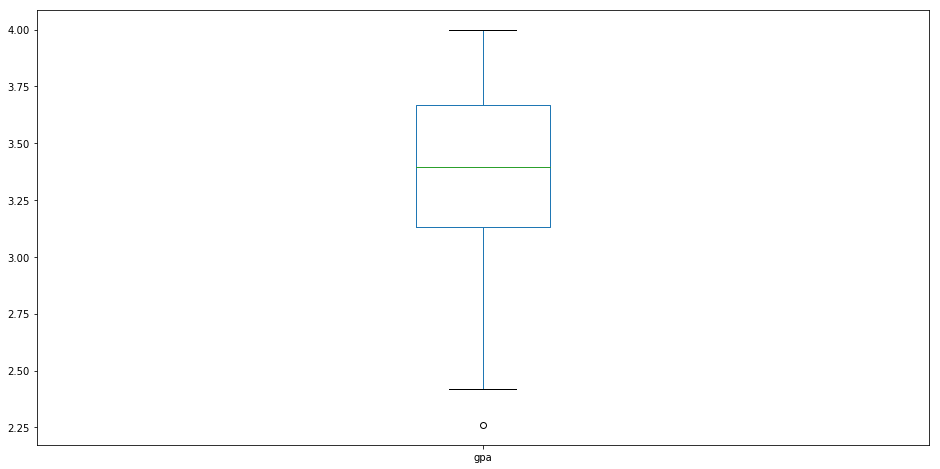

In [77]:
df['gpa'].plot(kind='box',figsize=(16, 8))

Answer:Scatter plots and box plots.

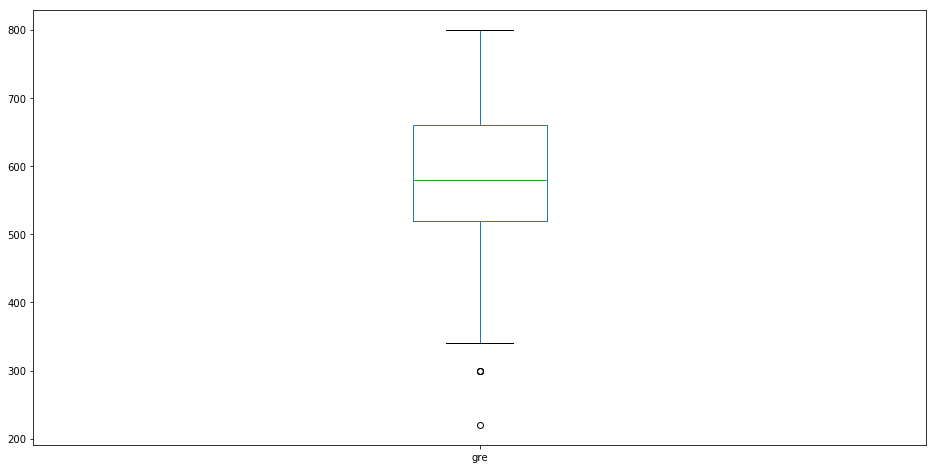

In [78]:
df['gre'].plot(kind='box',figsize=(16, 8))

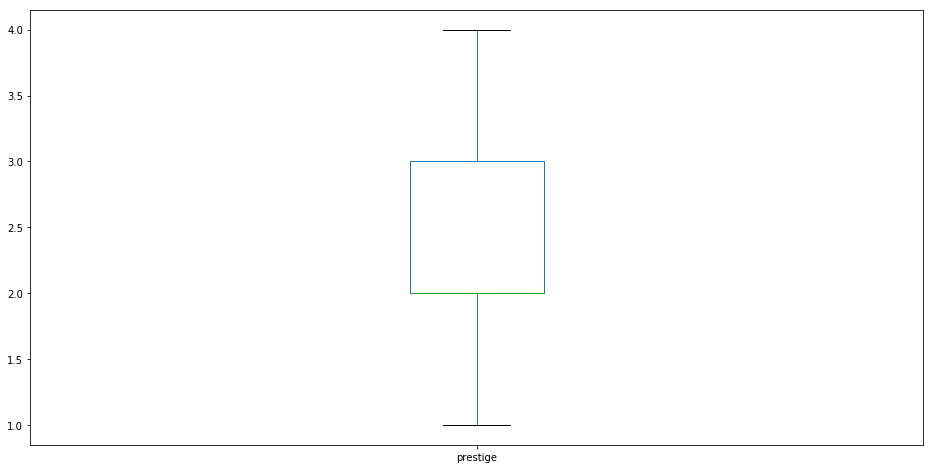

In [79]:
df['prestige'].plot(kind='box',figsize=(16, 8))

#### 4a. What is colinearity? 

Answer: When two variables are correlated therefore they explani the same thing and artificiall inflate t-score.

#### 4b. How will you test for colinearity? 

Answer: Look for correlation among different variables.

In [81]:
df.corr()

,admit,gre,gpa,prestige
admit,1.000000,0.182919,0.175952,-0.241355
gre,0.182919,1.000000,0.382408,-0.124533
gpa,0.175952,0.382408,1.000000,-0.059031
prestige,-0.241355,-0.124533,-0.059031,1.000000


#### 5. What is your exploratory analysis plan?
Using the above information, write an exploratory analysis plan that would allow you or a colleague to reproduce your analysis 1 year from now. 

Answer: 1.) Two variables are categorical in their nature:
                - admit - binary distribution (either 1 or )
                -prestige - categorical (from 1 -to 4)
        2.) Gre -is normally distributed with slight positive skew
        3.) Gpa - has right fat tails
        4.) The correlation among variables does indicate that there is slight positive correlation between 'gpa' and 'gre'. 

AttributeError: 'DataFrame' object has no attribute 'isna'

## Bonus Questions:
1. Outline your analysis method for predicting your outcome
2. Write an alternative problem statement for your dataset
3. Articulate the assumptions and risks of the alternative model